## 산업별 지역별 기업수 (지역별로 top1 업종)
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1BD1007&conn_path=I2
- 2013 ~ 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [36]:
companies = pd.read_csv("../../Data/companies/산업별_지역별_기업수_20230207162528.csv", encoding='euc-kr')
companies.head()
# companies.tail()

,산업별(1),지역별(1),2013,2013.1,2013.2,2014,2014.1,2014.2,2015,2015.1,...,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1
0,산업별(1),지역별(1),활동,신생,소멸,활동,신생,소멸,활동,신생,...,신생,소멸,활동,신생,소멸,활동,신생,소멸,활동,신생
1,전체,전국,5377482,748691,664265,5558767,842789,776516,5553564,813202,...,919752,692083,6526544,996779,736393,6820850,1058842,761221,7056079,1022439
2,전체,서울,1258829,168425,150812,1285898,181516,187357,1251731,170463,...,194628,146325,1416145,203968,157419,1461274,216971,167815,1477042,199963
3,전체,부산,370922,49110,43743,381957,55145,49300,383012,52489,...,53937,43857,425613,59057,46120,439033,61626,47941,447769,58759
4,전체,대구,255803,33186,28898,264875,39148,34878,264637,36758,...,37788,30665,296026,39971,31954,303699,41361,31787,309714,39182


In [27]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   산업별(1)  325 non-null    object
 1   지역별(1)  325 non-null    object
 2   2013    325 non-null    object
 3   2013.1  325 non-null    object
 4   2013.2  325 non-null    object
 5   2014    325 non-null    object
 6   2014.1  325 non-null    object
 7   2014.2  325 non-null    object
 8   2015    325 non-null    object
 9   2015.1  325 non-null    object
 10  2015.2  325 non-null    object
 11  2016    325 non-null    object
 12  2016.1  325 non-null    object
 13  2016.2  325 non-null    object
 14  2017    325 non-null    object
 15  2017.1  325 non-null    object
 16  2017.2  325 non-null    object
 17  2018    325 non-null    object
 18  2018.1  325 non-null    object
 19  2018.2  325 non-null    object
 20  2019    325 non-null    object
 21  2019.1  325 non-null    object
 22  2019.2  325 non-null    ob

In [23]:
companies.iloc[:, 0].value_counts()

숙박 및 음식점업                  18
정보통신업                      18
예술, 스포츠 및 여가관련 서비스업        18
보건업 및 사회복지 서비스업            18
교육서비스업                     18
사업 시설관리, 사업지원 및 임대 서비스업    18
전문, 과학 및 기술서비스업            18
부동산업                       18
금융 및 보험업                   18
협회 및 단체, 수리 및 기타 개인서비스업    18
전체                         18
운수 및 창고업                   18
도매 및 소매업                   18
건설업                        18
수도, 하수 및 폐기물처리, 원료재생업      18
전기, 가스, 증기 및 공기조절 공급업      18
제조업                        18
광업                         18
산업별(1)                      1
Name: 산업별(1), dtype: int64

- 1차 산업: 자원을 직접 채취하거나 생산 활동 과정이 자연 환경과 직접 연관된 산업
    -  ex) 농업, 축산업, 어업, 임업, 수산업
- 2차 산업: 1차 산업에서 얻은 생산물과 천연자원을 가공하여 인간에게 필요한 재화나 에너지를 생산하는 산업
    -  ex) 광업, 건설업, 전력업, 가스업, 수도업, 제조업, 수리업, 보수업, 방송업
- 3차 산업: 1차 산업이나 2차 산업이 생산한 재화의 이동, 소비, 축적과 관련된 산업
    -  ex) 금융업, 보험업, 유통업, 도매업, 서비스업(상품 판매 등의 서비스를 제공하는 산업)

2013년에 각 지역에서 가장 많은 기업

In [75]:
c2013 = companies.iloc[19:, :5]
c2013['년도'] = '2013'
c2013.columns = ['산업별', '지역별', '활동', '신생', '소멸', '년도']

c2013

,산업별,지역별,활동,신생,소멸,년도
19,광업,전국,1662,196,198,2013
20,광업,서울,53,6,4,2013
21,광업,부산,13,1,1,2013
22,광업,대구,12,4,4,2013
23,광업,인천,21,1,1,2013
...,...,...,...,...,...,...
320,"협회 및 단체, 수리 및 기타 개인서비스업",전북,8602,924,974,2013
321,"협회 및 단체, 수리 및 기타 개인서비스업",전남,8064,875,973,2013
322,"협회 및 단체, 수리 및 기타 개인서비스업",경북,13005,1434,1361,2013
323,"협회 및 단체, 수리 및 기타 개인서비스업",경남,15770,1978,1933,2013


In [84]:
# 형변환 
c2013.replace("-", 0, inplace=True)

c2013['활동'] = c2013['활동'].astype(int)
c2013['신생'] = c2013['신생'].astype(int)
c2013['소멸'] = c2013['소멸'].astype(int)

c2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 19 to 324
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   산업별     306 non-null    object
 1   지역별     306 non-null    object
 2   활동      306 non-null    int64 
 3   신생      306 non-null    int64 
 4   소멸      306 non-null    int64 
 5   년도      306 non-null    object
dtypes: int64(3), object(3)
memory usage: 14.5+ KB


In [86]:
c2013_max = c2013.pivot_table('활동', index='지역별', aggfunc='max')
c2013_max

,활동
지역별,
강원,39469
경기,303103
경남,78392
경북,63413
광주,38634
대구,66423
대전,40373
부산,95755
서울,326126


In [93]:
finaldf = pd.merge(c2013, c2013_max, on = '활동', how = 'right')

In [106]:
aa = companies.iloc[19:,:2]

In [108]:
years = list(range(2014, 2022))
count = 0

# finaldf = pd.merge(c2013, c2013_max, on = '활동', how = 'right')

for i in [5,8,11,14,17,20,23]:
    c_year = companies.iloc[19:, i:(i+3)]
    c_year['년도'] = years[count]
    c_year = pd.concat([aa, c_year], axis=1)
    c_year.columns = ['산업별', '지역별', '활동', '신생', '소멸', '년도']

    # - 제거
    c_year.replace("-", 0, inplace=True)

    # 숫자로 형변환
    c_year['활동'] = c_year['활동'].astype(int)
    c_year['신생'] = c_year['신생'].astype(int)
    c_year['소멸'] = c_year['소멸'].astype(int)

    # max만 뽑기
    cyear_max = c_year.pivot_table('활동', index='지역별', aggfunc='max')

    # 데이터 프레임 merge (업종 정보를 가져오기 위해)
    cyear_df = pd.merge(c_year, cyear_max, on = '활동', how = 'right')

    # 데이터 프레임 쌓기
    finaldf = pd.concat([finaldf, cyear_df], axis=0)
    
    count += 1
finaldf


In [113]:
finaldf.reset_index(drop=True, inplace=True)
finaldf

,산업별,지역별,활동,신생,소멸,년도
0,도매 및 소매업,강원,39469,5355,5455,2013
1,부동산업,경기,303103,35757,29408,2013
2,도매 및 소매업,경남,78392,12612,11214,2013
3,도매 및 소매업,경북,63413,9127,8441,2013
4,도매 및 소매업,광주,38634,6342,5961,2013
...,...,...,...,...,...,...
140,도매 및 소매업,전남,50512,6948,5656,2020
141,도매 및 소매업,전북,50755,6953,5932,2020
142,부동산업,제주,22370,4361,3077,2020
143,도매 및 소매업,충남,57178,8409,6797,2020


In [112]:
len(pd.unique(finaldf['지역별'])) * len(pd.unique(finaldf['년도']))

144

In [119]:
finaldf[finaldf['년도'] == 2020]['산업별'].value_counts()

도매 및 소매업    12
부동산업         6
Name: 산업별, dtype: int64

In [133]:
bb = finaldf[finaldf['년도'] == 2020]['산업별']
bb = list(bb)
bb

['도매 및 소매업',
 '부동산업',
 '도매 및 소매업',
 '도매 및 소매업',
 '도매 및 소매업',
 '도매 및 소매업',
 '도매 및 소매업',
 '도매 및 소매업',
 '부동산업',
 '부동산업',
 '도매 및 소매업',
 '부동산업',
 '부동산업',
 '도매 및 소매업',
 '도매 및 소매업',
 '부동산업',
 '도매 및 소매업',
 '도매 및 소매업']

In [143]:
cc = []

for i in bb:
    cc.append(1 if i == '부동산업' else 2)
    
cc = pd.DataFrame(cc)
cc

,0
0,2
1,1
2,2
3,2
4,2
5,2
6,2
7,2
8,1
9,1


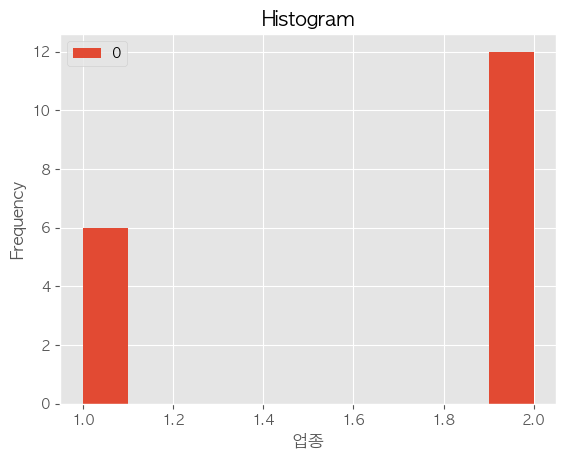

In [142]:
plt.style.use('ggplot')

cc.plot(
    kind='hist',
    # bins=10, #범위
    # color='coral',
    # figsize=(10,5),
)

plt.title('Histogram')
plt.xlabel('업종')

plt.show()

In [144]:
finaldf[finaldf['년도'] == 2020]

,산업별,지역별,활동,신생,소멸,년도
127,도매 및 소매업,강원,41336,5554,4550,2020
128,부동산업,경기,482682,97751,58163,2020
129,도매 및 소매업,경남,85322,12160,10178,2020
130,도매 및 소매업,경북,69815,9471,8002,2020
131,도매 및 소매업,광주,41650,5810,4847,2020
132,도매 및 소매업,대구,71749,9605,8142,2020
133,도매 및 소매업,대전,42855,6405,5223,2020
134,도매 및 소매업,부산,103209,14454,12091,2020
135,부동산업,서울,437586,73517,48754,2020
136,부동산업,세종,15585,3706,2002,2020
